<a href="https://colab.research.google.com/github/Katlynn23/Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katlynn Reed

In [41]:
import pandas as pd
import numpy
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from google.colab import drive
drive.mount('/content/drive')
car = pd.read_csv('/content/drive/MyDrive/CS167datasets/CarPricesProject1.csv')
car

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,NaN,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [42]:
car['cylindernumber'].replace(["two","three","four","five","six","eight","twelve"],[2,3,4,5,6,8,12],inplace=True)
car['fueltype'].replace(['gas','diesel'],[0,1],inplace=True)
car['aspiration'].replace(['std','turbo'],[0,1],inplace=True)
car['doornumber'].replace(['two','four'],[0,1],inplace=True)
car['enginelocation'].replace(['front','rear'],[0,1],inplace=True)
car_dummy=pd.get_dummies(car,columns=['carbody','drivewheel','enginetype','fuelsystem'])
car_dummy

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,alfa-romero giulia,0.0,0.0,0.0,0.0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3.0,alfa-romero stelvio,0.0,0.0,0.0,0.0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1.0,alfa-romero Quadrifoglio,0.0,0.0,0.0,0.0,94.5,171.2,65.5,52.4,...,1,0,0,0,0,0,0,1,0,0
3,2.0,audi 100 ls,0.0,0.0,1.0,0.0,99.8,176.6,66.2,NaN,...,0,0,0,0,0,0,0,1,0,0
4,2.0,audi 100ls,0.0,0.0,1.0,0.0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,volvo 145e (sw),0.0,0.0,1.0,0.0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,1,0,0
201,-1.0,volvo 144ea,0.0,1.0,1.0,0.0,109.1,188.8,68.8,55.5,...,0,0,0,0,0,0,0,1,0,0
202,-1.0,volvo 244dl,0.0,0.0,1.0,0.0,109.1,188.8,68.9,55.5,...,1,0,0,0,0,0,0,1,0,0
203,-1.0,volvo 246,1.0,1.0,1.0,0.0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,0


In [43]:
car.isna().any()

symboling           True
CarName             True
fueltype            True
aspiration          True
doornumber          True
carbody             True
drivewheel          True
enginelocation      True
wheelbase           True
carlength           True
carwidth            True
carheight           True
curbweight          True
enginetype          True
cylindernumber      True
enginesize          True
fuelsystem          True
boreratio           True
stroke              True
compressionratio    True
horsepower          True
peakrpm             True
citympg             True
highwaympg          True
price               True
dtype: bool

In [44]:
#Change all numerical values so you dont loose a large chunk of data
sym_mean= car_dummy['symboling'].mean()
car_dummy['symboling'].fillna(sym_mean, inplace=True)
type_mean= car_dummy['fueltype'].mean()
car_dummy['fueltype'].fillna(type_mean, inplace=True)
asp_mean= car_dummy['aspiration'].mean()
car_dummy['aspiration'].fillna(asp_mean, inplace=True)
doornum_mean= car_dummy['doornumber'].mean()
car_dummy['doornumber'].fillna(doornum_mean, inplace=True)
loc_mean= car_dummy['enginelocation'].mean()
car_dummy['enginelocation'].fillna(loc_mean, inplace=True)
wheelbase_mean= car_dummy['wheelbase'].mean()
car_dummy['wheelbase'].fillna(wheelbase_mean, inplace=True)
carlength_mean= car_dummy['carlength'].mean()
car_dummy['carlength'].fillna(carlength_mean, inplace=True)
carwidth_mean= car_dummy['carwidth'].mean()
car_dummy['carwidth'].fillna(carwidth_mean, inplace=True)
carheight_mean= car_dummy['carheight'].mean()
car_dummy['carheight'].fillna(carheight_mean, inplace=True)
curbweight_mean= car_dummy['curbweight'].mean()
car_dummy['curbweight'].fillna(curbweight_mean, inplace=True)
cyl_mean= car_dummy['cylindernumber'].mean()
car_dummy['cylindernumber'].fillna(cyl_mean, inplace=True)
enginesize_mean= car_dummy['enginesize'].mean()
car_dummy['enginesize'].fillna(enginesize_mean, inplace=True)
boreratio_mean= car_dummy['boreratio'].mean()
car_dummy['boreratio'].fillna(boreratio_mean, inplace=True)
stroke_mean= car_dummy['stroke'].mean()
car_dummy['stroke'].fillna(stroke_mean, inplace=True)
compressionratio_mean= car_dummy['compressionratio'].mean()
car_dummy['compressionratio'].fillna(compressionratio_mean, inplace=True)
horsepower_mean= car_dummy['horsepower'].mean()
car_dummy['horsepower'].fillna(horsepower_mean, inplace=True)
peakrpm_mean= car_dummy['peakrpm'].mean()
car_dummy['peakrpm'].fillna(peakrpm_mean, inplace=True)
citympg_mean= car_dummy['citympg'].mean()
car_dummy['citympg'].fillna(citympg_mean, inplace=True)
highwaympg_mean= car_dummy['highwaympg'].mean()
car_dummy['highwaympg'].fillna(highwaympg_mean, inplace=True)
price_mean= car_dummy['price'].mean()
car_dummy['price'].fillna(price_mean, inplace=True)
print('after:',car_dummy.isna().any())

after: symboling              False
CarName                 True
fueltype               False
aspiration             False
doornumber             False
enginelocation         False
wheelbase              False
carlength              False
carwidth               False
carheight              False
curbweight             False
cylindernumber         False
enginesize             False
boreratio              False
stroke                 False
compressionratio       False
horsepower             False
peakrpm                False
citympg                False
highwaympg             False
price                  False
carbody_convertible    False
carbody_hardtop        False
carbody_hatchback      False
carbody_sedan          False
carbody_wagon          False
drivewheel_4wd         False
drivewheel_fwd         False
drivewheel_rwd         False
enginetype_dohc        False
enginetype_dohcv       False
enginetype_l           False
enginetype_ohc         False
enginetype_ohcf        False
enginet

In [48]:
predictors = ['doornumber', 'carlength','carwidth', 'carheight']
target = "price"
train_data, test_data, train_sln, test_sln = \
        train_test_split(car_dummy[predictors], car_dummy[target], test_size = 0.2, random_state=41)
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)


train_data shape:  (164, 4)
test_data shape:  (41, 4)
train_sln shape:  (164,)
test_sln shape:  (41,)


In [102]:
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
#Not Normalized
dt = tree.DecisionTreeRegressor()
dt.fit(train_data,train_sln)
predictions = dt.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  6631991.8519920185
r2:  0.8246144061755035


In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

from sklearn.neighbors import KNeighborsRegressor
#Normalized
dt = tree.DecisionTreeRegressor()
dt.fit(train_data_normalized,train_sln)
predictions = dt.predict(test_data_normalized)
print('Normalized MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('Normalized r2: ', metrics.r2_score(test_sln, predictions))

Normalized MSE:  7126242.199552992
Normalized r2:  0.8115437642568304


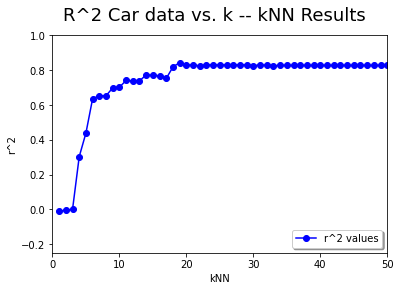

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

max_depth_vals = range(1,51)
norm = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val, criterion="poisson")
    dt.fit(train_data_normalized,train_sln)
    predictions = dt.predict(test_data_normalized)
    norm.append(metrics.r2_score(test_sln, predictions))

plt.suptitle('R^2 Car data vs. k -- kNN Results',fontsize=18)
plt.xlabel('kNN')
plt.ylabel('r^2')
plt.plot(max_depth_vals,norm,'bo-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,50,-0.25,1])
plt.show()

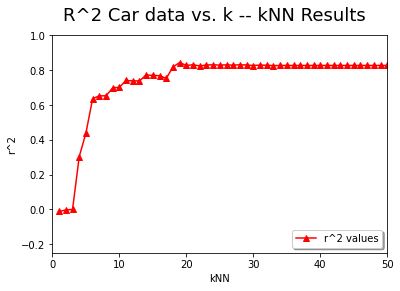

In [87]:
max_depth_vals = range(1,51)
non_norm = []


for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val, criterion="poisson")
    dt.fit(train_data,train_sln)
    predictions = dt.predict(test_data)
    non_norm.append(metrics.r2_score(test_sln, predictions))
    
plt.suptitle('R^2 Car data vs. k -- kNN Results',fontsize=18)
plt.xlabel('kNN')
plt.ylabel('r^2')
plt.plot(max_depth_vals,norm,'r^-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,50,-0.25,1])
plt.show()

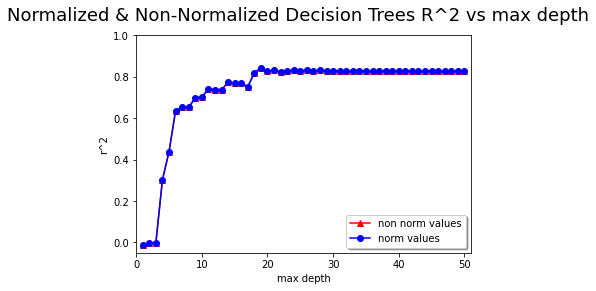

In [83]:
max_depth_vals = range(1,51)
non_norm = []
norm = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val, criterion="poisson")
    dt.fit(train_data,train_sln)
    predictions = dt.predict(test_data)
    non_norm.append(metrics.r2_score(test_sln, predictions))

    dt_norm = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val,criterion="poisson")
    dt_norm.fit(train_data_normalized,train_sln)
    predictions_normalized = dt_norm.predict(test_data_normalized)
    norm.append(metrics.r2_score( test_sln,predictions_normalized))
plt.suptitle('Normalized & Non-Normalized Decision Trees R^2 vs max depth',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('r^2')
plt.plot(max_depth_vals,non_norm,'r^-',label='non norm values')
plt.plot(max_depth_vals,norm,'bo-',label='norm values')

plt.legend(loc='lower right', shadow=True)
plt.axis([0,51,-.05,1])
plt.show()

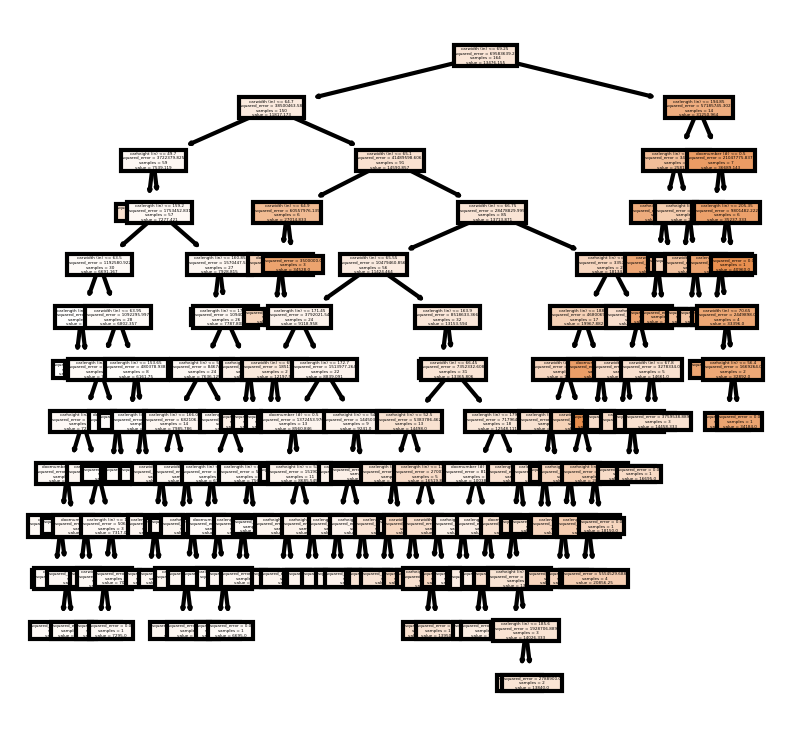

In [95]:
import matplotlib.pyplot as plt
fn=['doornumber (#)','carlength (in)','carwidth (in)','carheight (in)']
cn=['price']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [96]:
from sklearn.neighbors import KNeighborsClassifier
dt = tree.DecisionTreeClassifier(random_state = 0)
dt.fit(train_data,train_sln)
prediction = dt.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,prediction))

ValueError: ignored